In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn  as sns

# Exploratory Data Analysis (EDA)

<ul>
<li>
        Overall Qual: Rating for the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent)
</li>
<li>
        Overall Cond: Rating for the overall condition of the house on a scale from 1 (very poor) to 10 (excellent)
</li>
<li>
        Gr Liv Area: Above grade (ground) living area in square feet
</li>
<li>
        Central Air: Central air conditioning (N=no, Y=yes)
</li>
<li>
        Total Bsmt SF: Total square feet of the basement area
</li>
<li>
        SalePrice: Sale price in U.S. dollars ($)
</li>
</ul>

In [60]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [61]:
df = pd.read_csv('./datos/AmesHousing.txt' , sep= '\t', usecols=columns)

In [62]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [63]:
df.tail()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2925,6,6,1003.0,Y,1003,142500
2926,5,5,864.0,Y,902,131000
2927,5,5,912.0,Y,970,132000
2928,5,5,1389.0,Y,1389,170000
2929,7,5,996.0,Y,2000,188000


In [64]:
df.shape

(2930, 6)

In [65]:
df.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,SalePrice
count,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000
mean,6.094881,5.563140,1051.614544,1499.690444,180796.060068
std,1.411026,1.111537,440.615067,505.508887,79886.692357
min,1.000000,1.000000,0.000000,334.000000,12789.000000
25%,5.000000,5.000000,793.000000,1126.000000,129500.000000
50%,6.000000,5.000000,990.000000,1442.000000,160000.000000
75%,7.000000,6.000000,1302.000000,1742.750000,213500.000000
max,10.000000,9.000000,6110.000000,5642.000000,755000.000000


In [66]:
df['Central Air'] = df['Central Air'].map({'N':0, 'Y':1})

In [67]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [68]:
df = df.dropna(axis=0)

In [69]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [70]:
df.shape

(2929, 6)

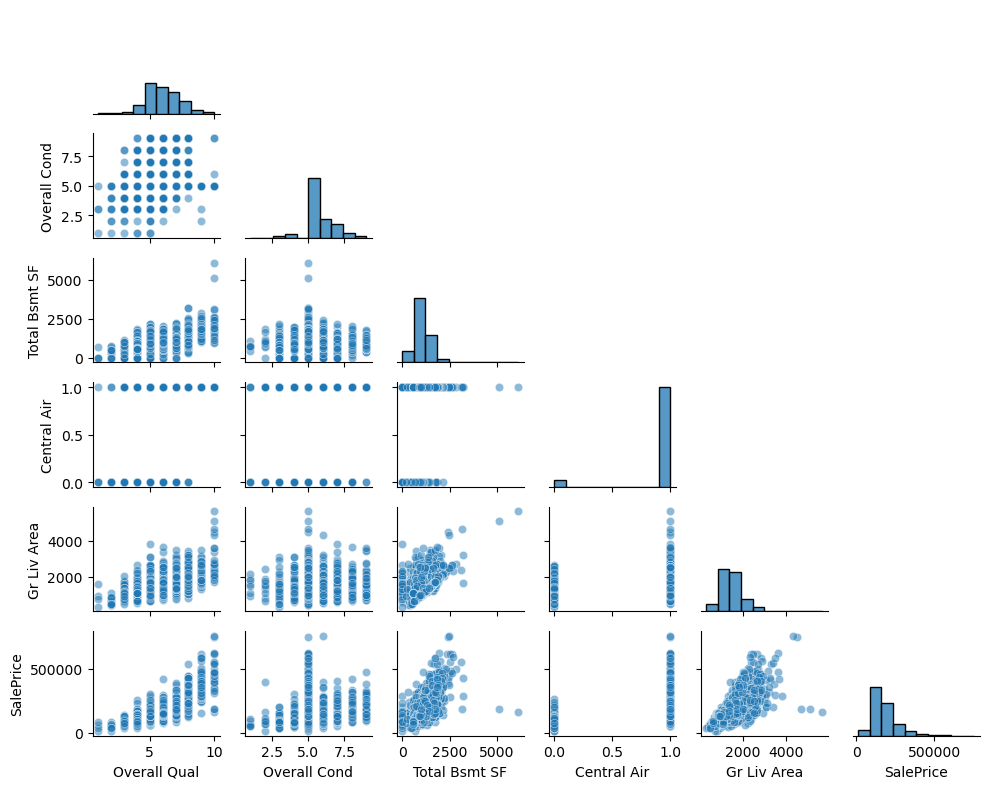

In [71]:
sns.pairplot(df,corner= True , plot_kws={'alpha':0.5}, diag_kws={'bins':10, 'stat':'count'})
plt.gcf().set_size_inches(10, 8)
plt.tight_layout()
plt.show()

In [72]:
df.corr() #correlacion, covarianza normalizada de 1 a -1

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
Overall Qual,1.000000,-0.094219,0.547294,0.287443,0.570304,0.799138
Overall Cond,-0.094219,1.000000,-0.173344,0.119611,-0.115176,-0.101191
Total Bsmt SF,0.547294,-0.173344,1.000000,0.218726,0.444675,0.632280
Central Air,0.287443,0.119611,0.218726,1.000000,0.123358,0.264700
Gr Liv Area,0.570304,-0.115176,0.444675,0.123358,1.000000,0.706628
SalePrice,0.799138,-0.101191,0.632280,0.264700,0.706628,1.000000


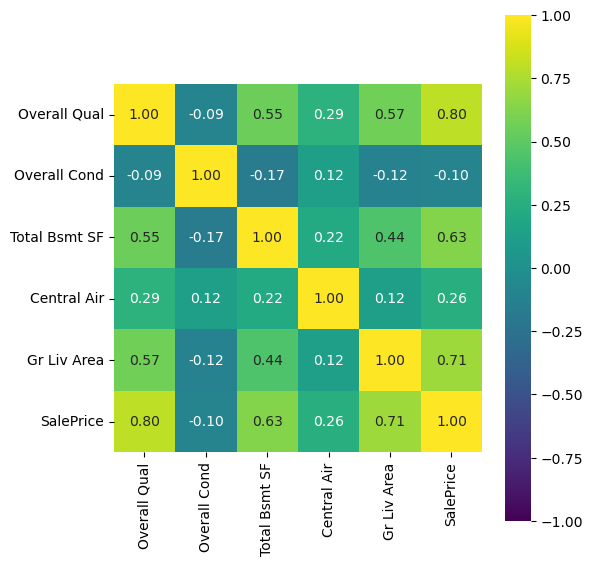

In [73]:
plt.figure(figsize= (6,6))
sns.heatmap(
    df.corr(),
    cmap='viridis', #coolwarm'
    annot=True,
    fmt='.2f',
    square= True,
    vmin=-1.0,
    vmax=1.0
)
plt.tight_layout()
plt.show()

# Simple linear Regression

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature

In [75]:
X = df[[ 'Gr Liv Area' ]].values
y = df ['SalePrice'].values[:, np.newaxis]

In [76]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
#La estandarizacion pasa a ser parte de la predicción, está basado en datos estandarizados

In [77]:
m = X.shape[0]
eta = 0.1
n_epochs = 500

In [78]:
rng = np.random.default_rng(seed=42)

In [79]:
theta = rng.standard_normal((2,1))
theta

array([[ 0.30471708],
       [-1.03998411]])

In [80]:
X_b = add_dummy_feature(X_std)

In [81]:
J_log = np.zeros(n_epochs)

for i in range(n_epochs):
    J_log[i] = (1/m)*((X_b@theta - y_std)**2).sum()
    
    gradients = 2/m* X_b.T @ (X_b@theta - y_std )
    theta = theta - eta*gradients

theta

array([[-1.38592008e-16],
       [ 7.06628223e-01]])

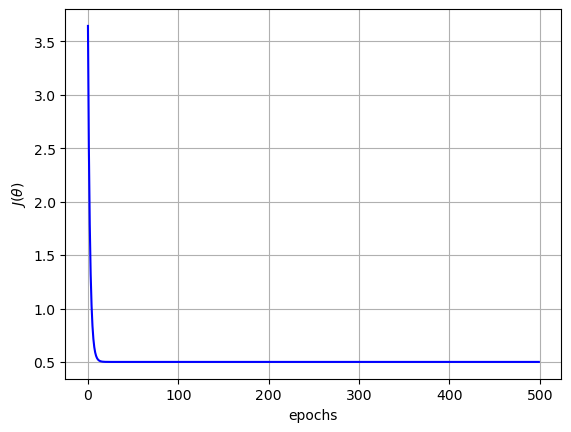

In [82]:
plt.plot(np.arange(n_epochs), J_log, 'b-')
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')
plt.grid()
plt.show()

In [83]:
X_new = np.array([[X.min()], [X.max()]])
X_new_std = sc_x.transform(X_new)
X_new_b = add_dummy_feature(X_new_std)

y_predict_std = X_new_b @ theta
y_predict = sc_y.inverse_transform(y_predict_std)
y_predict

array([[ 50639.50897509],
       [643364.00867569]])

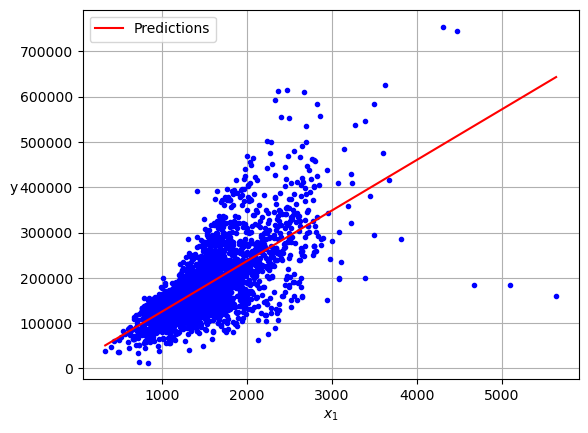

In [84]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')

plt.xlabel('$x_1$')
plt.ylabel('y', rotation=0)
plt.legend(loc='upper left')
#plt.axis([0, 2,0, 15])
plt.grid()
plt.show()

# Multiple Linear Regression

In [85]:
X = df[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF']].values
y = df ['SalePrice'].values[:, np.newaxis]

In [86]:
from sklearn.model_selection import train_test_split
#validar modelo con datos nunca vistos

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
#de ese dataset agarra el 30% 

In [88]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X_train)
y_std = sc_y.fit_transform(y_train)

In [89]:
m = X_train.shape[0]
eta = 0.1
n_epochs = 500

In [90]:
rng = np.random.default_rng(seed=42)

In [91]:
theta = rng.standard_normal((6,1))
theta

array([[ 0.30471708],
       [-1.03998411],
       [ 0.7504512 ],
       [ 0.94056472],
       [-1.95103519],
       [-1.30217951]])

In [92]:
X_b = add_dummy_feature(X_std)

In [93]:
J_log = np.zeros(n_epochs)

for i in range(n_epochs):
    J_log[i] = (1/m)*((X_b@theta - y_std)**2).sum()
    
    gradients = 2/m* X_b.T @ (X_b@theta - y_std )
    theta = theta - eta*gradients

theta

array([[4.41816850e-17],
       [4.62310224e-01],
       [1.08892892e-02],
       [3.47633844e-01],
       [3.63180708e-02],
       [2.26622872e-01]])

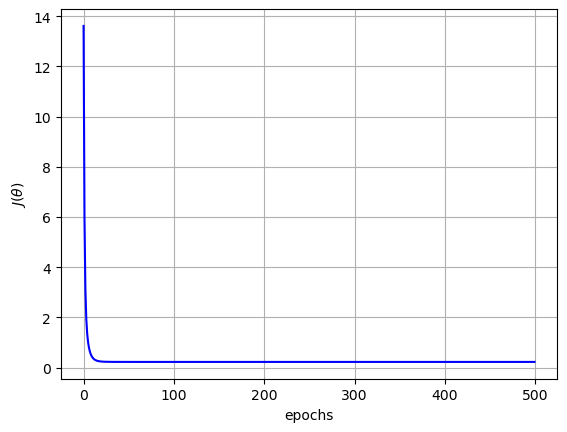

In [94]:
plt.plot(np.arange(n_epochs), J_log, 'b-')
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')
plt.grid()
plt.show()

In [95]:
y_train_pred = sc_y.inverse_transform(X_b @ theta)

In [96]:
X_test_std = sc_x.transform(X_test)
y_test_std = sc_y.transform(y_test)

X_test_b = add_dummy_feature(X_test_std)
y_test_pred = sc_y.inverse_transform(X_test_b @ theta)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [98]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


In [99]:
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f'RMSE train: {rmse_train:.2f}')
print(f'RMSE test: {rmse_test:.2f}')

RMSE train: 38693.88
RMSE test: 38943.11


In [100]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')
#es bueno que se parezcan el train y test

MAE train: 25983.03
MAE test: 24921.29


In [101]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R2 train: {r2_train:.2f}')
print(f'R2 test: {r2_test:.2f}')
#mientras más cercano a 1 mejor y saber que si chambea

R2 train: 0.77
R2 test: 0.75


# Polynomial Regresion


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [114]:
'''X =  df[['Gr Liv Area']].values
y =  df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]'''

X =  df[['Overall Qual']].values
y =  df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

In [115]:
model = LinearRegression()
quadratic =  PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)

In [116]:
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:,np.newaxis]
linear_model = model.fit(X,y)
y_lin_fit = linear_model.predict(X_fit)
linear_r2 = r2_score(y, linear_model.predict(X))

quadratic_model = model.fit(X_quad,y)
y_quad_fit = quadratic_model.predict(quadratic.transform(X_fit))
quadratic_r2 = r2_score(y, quadratic_model.predict(X_quad))

cubic_model = model.fit(X_cubic,y)
y_cubic_fit = cubic_model.predict(cubic.transform(X_fit))
cubic_r2 = r2_score(y, cubic_model.predict(X_cubic))

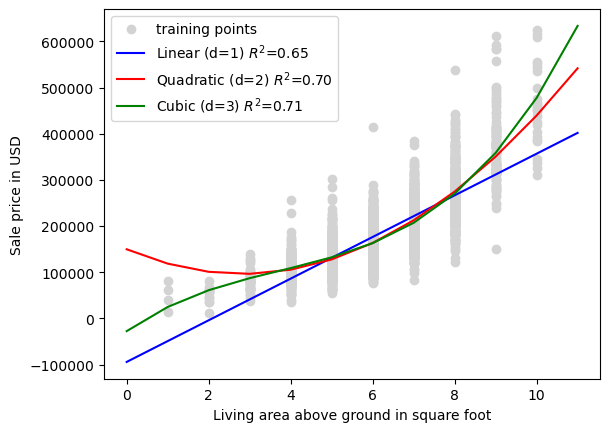

In [117]:
plt.scatter(X, y, label = 'training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, label=f'Linear (d=1) $R^2$={linear_r2:.2f}', color='blue')
plt.plot(X_fit, y_quad_fit, label=f'Quadratic (d=2) $R^2$={quadratic_r2:.2f}', color='red')
plt.plot(X_fit, y_cubic_fit, label=f'Cubic (d=3) $R^2$={cubic_r2:.2f}', color='green')


plt.xlabel('Living area above ground in square foot')
plt.ylabel('Sale price in USD')
plt.legend(loc='upper left')
plt.show()